# Importing data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_test.csv")
train = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_train.csv")
labels = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_labels_train.csv")

In [43]:
df = pd.merge(train, labels, on = ["city", "year", "weekofyear"]).drop("week_start_date", axis=1).dropna()

In [44]:
#Convert city to dummy
mapping = {'sj': 0, 'iq': 1}
df = df.replace(mapping)

In [45]:
#Convert data to arrays
y = df.loc[:, ['total_cases']]
X = df.iloc[:, :-1]

In [46]:
# Print the dimensions of X and y 
print("Dimensions of y: {}".format(y.shape))
print("Dimensions of X: {}".format(X.shape))

Dimensions of y: (1199, 1)
Dimensions of X: (1199, 23)


# EDA

In [47]:
import seaborn as sns

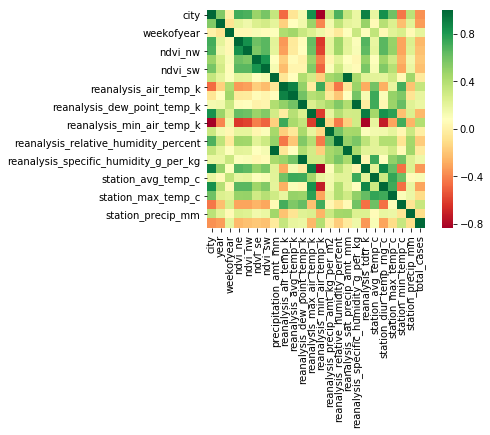

In [48]:
sns.heatmap(df.corr(), square=True, cmap="RdYlGn")

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [50]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [53]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)